Programació per a *Data Science*
============================

Unitat 4: Llibreries científiques en Python - SciPy
-------------------------------------------------

Instruccions d'ús
-----------------

A continuació es presentaran explicacions i exemples d'ús de la
llibreria SciPy. Recordeu que podeu anar executant els exemples per
obtenir-ne els resultats.

Exemple 1: simulació d'una apocalipsi zombi
--------------------------------------------

[Munz i altres al
2009](http://mysite.science.uottawa.ca/rsmith43/Zombies.pdf) van definir
un model d'invasió zombi mitjançant un sistema d'equacions diferencials
ordinàries:

-   *dS/dt = P - B\*S\*Z - d\*S*
-   *dZ/dt = B\*S\*Z + G\*R - A\*S\*Z*
-   *dR/dt = d\*S + A\*S\*Z - G\*R*

En què:

    S: el nombre de víctimes
    Z: el nombre de zombis
    R: el nombre de gent assassinada pels zombis
    P: la ràtio de naixements
    d: la probabilitat de mort natural
    B: la probabilitat de propagació de la malaltia zombi (persones vives i sanes)
    G: la probabilitat que una persona morta torni a la vida com a zombi
    A: la probabilitat que un zombi sigui aniquilat completament

SciPy pot resoldre sistemes de primer ordre d'equacions diferencials de
manera senzilla. Ens centrarem a resoldre l'expressió: *dy/dt = f(y,
t)* on *y = \[S, Z, R\]*.

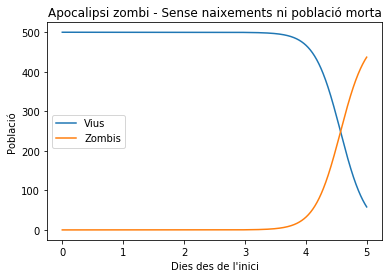

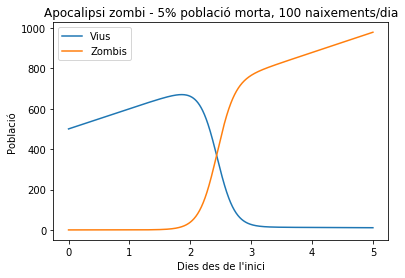

In [3]:
%matplotlib inline

# Font del codi: http://wiki.scipy.org/Cookbook/Zombie_Apocalypse_ODEINT

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

P = 0       # Ràtio de naixements
d = 0.0001  # Percentatge de mort natural (per dia)
B = 0.0095  # Percentatge de transmissió  (per dia)
G = 0.0001  # Percentatge de resurreccions (per dia)
A = 0.0001  # Percentatge de destrucció  (per dia)

# Resol el sistema dy/dt = f(y, t):
def f(y, t):
    Si = y[0]
    Zi = y[1]
    Ri = y[2]
    # El model de Munz et al. 2009
    f0 = P - B*Si*Zi - d*Si
    f1 = B*Si*Zi + G*Ri - A*Si*Zi
    f2 = d*Si + A*Si*Zi - G*Ri
    return [f0, f1, f2]

# Condicions inicials
S0 = 500.               # població inicial
Z0 = 0                  # població inicial zombie
R0 = 0                  # població inicial muerta
y0 = [S0, Z0, R0]       # condicions inicials expressades com un vector
t  = np.linspace(0, 5., 1000)   # vector de temps (passos de simulació)

# Resolem el sistema:
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# Representem els resultats:
plt.figure()
plt.plot(t, S, label='Vius')
plt.plot(t, Z, label='Zombis')
plt.xlabel("Dies des de l'inici")
plt.ylabel(u'Població')
plt.title(u'Apocalipsi zombi - Sense naixements ni població morta')
plt.legend(loc=0)

# Canviem les condicions inicials:
R0 = 0.05*S0   # 5% de la població inicial està morta
P  = 100       # 100 nous naixements per dia
y0 = [S0, Z0, R0]

# Tornem a resoldre el sistema:
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Vius')
plt.plot(t, Z, label='Zombis')
plt.xlabel("Dies des de l'inici")
plt.ylabel(u'Població')
plt.title(u'Apocalipsi zombi - 5% població morta, 100 naixements/dia')
plt.legend(loc=0)
pass

Exemple 2: buscant cristalls de proteïnes
-----------------------------------------

La criomicroscòpia electrònica és una tècnica de microscòpia molt
utilitzada en biologia estructural en què la mostra que s'ha d'estudiar es troba
a temperatures criogèniques. La imatge següent és d'una solució de la
proteïna GroEL (font: Wikipedia - "Cryoem groel", Vossman):

<img src="files/media/Cryoem_groel.png">

A continuació escriurem un codi que ens permeti comptar el nombre de vidres de
GroEL a la imatge:

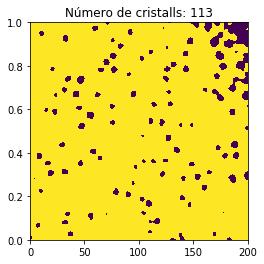

In [2]:
%matplotlib inline

import numpy as np
from scipy import ndimage
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Llegim la imatge original.
im = mpimg.imread('media/Cryoem_groel.png')
# Fem una còpia que utilitzarem per manipular.
image = im.copy()

# Apliquem un filtre gaussià amb mida de kernel 3.
im_g = ndimage.gaussian_filter(image, 3)
# Normalitzem
im_norm = (im_g - im_g.min()) / (float(im_g.max()) - im_g.min())
im_norm[im_norm < 0.5] = 0
im_norm[im_norm >= 0.5] = 1

# Convertim la imatge resultat per utilitzar la funció d'etiquetatge de Scipy.
result = 255 - (im_norm * 255).astype(np.uint8)

# Identifiquem el nombre de cristalls i els mostrem.
plt.title(u"Número de cristalls: %d" % ndimage.label(result)[1])
img = plt.imshow(np.asarray(im_norm), interpolation='nearest', extent=[0,200,0,1], aspect=200)
plt.show()

Aquest codi no és perfecte ja que no estem tenint en compte l'artefacte
de la cantonada superior dreta, però ens dona una idea de com aplicar
diferents filtres utilitzats en visió per ordinador a _scripts_ de molt
poques línies gràcies a SciPy.